In [1]:
import os
import numpy as np
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
import torchvision
import tifffile as tiff
import matplotlib.pyplot as plt
import time
from tqdm import tqdm
from copy import deepcopy
import random


In [2]:
# Load the saved day 7 features
combined_ex7 = torch.load('combined_ex7.pt')

# Load the saved day 10 features
combined_ex10 = torch.load('combined_ex10.pt')
# Verify the shapes
print(f"Loaded Day 7 Features Shape: {combined_ex7.shape}")
print(f"Loaded Day 10 Features Shape: {combined_ex10.shape}")


Loaded Day 7 Features Shape: torch.Size([646, 20])
Loaded Day 10 Features Shape: torch.Size([646, 20])


C:\Users\k54739\AppData\Local\Temp\ipykernel_21152\1356550951.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  combined_ex7 = torch.load('combined_ex7.pt')
C:\Users\k5473

In [3]:
# Load the saved day 7 features
combined_cond7 = torch.load('combined_cond7.pt')

# Load the saved day 10 features
combined_cond10 = torch.load('combined_cond10.pt')
# Verify the shapes
print(f"Loaded Day 7 Features Shape: {combined_cond7.shape}")
print(f"Loaded Day 10 Features Shape: {combined_cond10.shape}")


Loaded Day 7 Features Shape: torch.Size([650, 20])
Loaded Day 10 Features Shape: torch.Size([650, 20])


C:\Users\k54739\AppData\Local\Temp\ipykernel_21152\3329391658.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  combined_cond7 = torch.load('combined_cond7.pt')
C:\Users\k

In [4]:
# Load the saved day 7 features
combined_sd7 = torch.load('combined_sd7.pt')

# Load the saved day 10 features
combined_sd10 = torch.load('combined_sd10.pt')

# Verify the shapes
print(f"Loaded Day 7 Features Shape: {combined_sd7.shape}")
print(f"Loaded Day 10 Features Shape: {combined_sd10.shape}")


Loaded Day 7 Features Shape: torch.Size([638, 20])
Loaded Day 10 Features Shape: torch.Size([638, 20])


C:\Users\k54739\AppData\Local\Temp\ipykernel_21152\1607657786.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  combined_sd7 = torch.load('combined_sd7.pt')
C:\Users\k5473

In [5]:
train_day7_feats = combined_cond7 
train_day10_feats = combined_cond10 

In [6]:
train_day7_feats = combined_sd7 
train_day10_feats = combined_sd10 

In [5]:
train_day7_feats = combined_ex7 
train_day10_feats = combined_ex10 

In [ ]:
train_day7_feats.shape

In [ ]:
type(train_day7_feats)

In [ ]:
train_day7_feats[0].shape

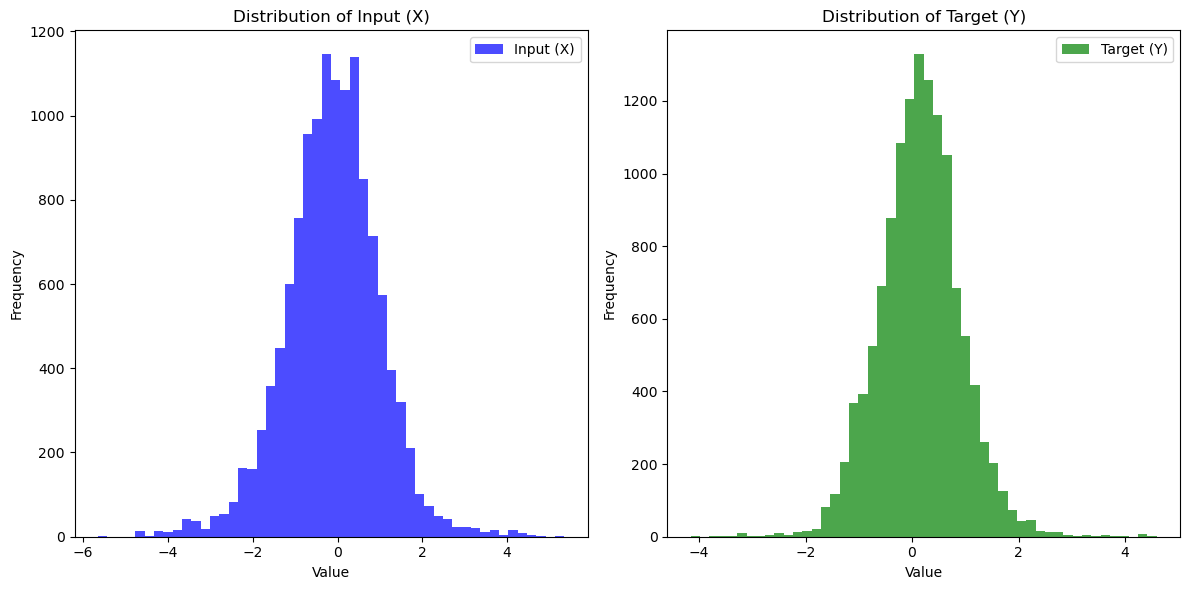

Input (X): Mean=-0.1142, Std=1.1140
Target (Y): Mean=0.1456, Std=0.7690


In [6]:
import matplotlib.pyplot as plt

# Plot histograms for input (X) and target (Y)
plt.figure(figsize=(12, 6))

# Flatten tensors to 1D for easier visualization
train_day7_feats_flat = train_day7_feats.flatten().cpu().numpy()
train_day10_feats_flat = train_day10_feats.flatten().cpu().numpy()

# Input (X) histogram
plt.subplot(1, 2, 1)
plt.hist(train_day7_feats_flat, bins=50, color='blue', alpha=0.7, label='Input (X)')
plt.title('Distribution of Input (X)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Target (Y) histogram
plt.subplot(1, 2, 2)
plt.hist(train_day10_feats_flat, bins=50, color='green', alpha=0.7, label='Target (Y)')
plt.title('Distribution of Target (Y)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Input (X): Mean={train_day7_feats.mean():.4f}, Std={train_day7_feats.std():.4f}")
print(f"Target (Y): Mean={train_day10_feats.mean():.4f}, Std={train_day10_feats.std():.4f}")


In [7]:
# Convert PyTorch tensor to NumPy array
train_day7_feats_numpy = train_day7_feats.numpy()
train_day10_feats_numpy = train_day10_feats.numpy()

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initialize separate MinMaxScaler for day7 and day10
scaler_day7 = MinMaxScaler()
scaler_day10 = MinMaxScaler()

# Fit and transform the train_day7_feats
train_day7_feats_minmaxed = scaler_day7.fit_transform(train_day7_feats_numpy)
print(train_day7_feats_minmaxed.shape)
# Get min and max values for day7
min_values_day7 = scaler_day7.data_min_
max_values_day7 = scaler_day7.data_max_

print(min_values_day7.shape)
print(max_values_day7.shape)
#print("Min values for day7:", min_values_day7)
#print("Max values for day7:", max_values_day7)

# Fit and transform the train_day10_feats (target)
train_day10_feats_minmaxed = scaler_day10.fit_transform(train_day10_feats_numpy)
print(train_day10_feats_minmaxed.shape)
# Get min and max values for day10
min_values_day10 = scaler_day10.data_min_
max_values_day10 = scaler_day10.data_max_

print(min_values_day10.shape)
print(max_values_day10.shape)
#print("Min values for day10:", min_values_day10)
#print("Max values for day10:", max_values_day10)

# Convert the scaled data back to PyTorch tensors (optional)
train_day7_feats_minmaxed = torch.tensor(train_day7_feats_minmaxed)
train_day10_feats_minmaxed = torch.tensor(train_day10_feats_minmaxed)


(646, 20)
(20,)
(20,)
(646, 20)
(20,)
(20,)


In [9]:
import joblib

# Save the scalers to disk
joblib.dump(scaler_day7, 'ex7.pkl')
joblib.dump(scaler_day10, 'ex10.pkl')

print("Scalers saved!")


Scalers saved!


In [ ]:
import joblib

# Save the scalers to disk
joblib.dump(scaler_day7, 'sd7.pkl')
joblib.dump(scaler_day10, 'sd10.pkl')

print("Scalers saved!")


In [ ]:
import joblib

# Save the scalers to disk
joblib.dump(scaler_day7, 'cond7.pkl')
joblib.dump(scaler_day10, 'cond10.pkl')

print("Scalers saved!")


In [ ]:
type(train_day7_feats_minmaxed)

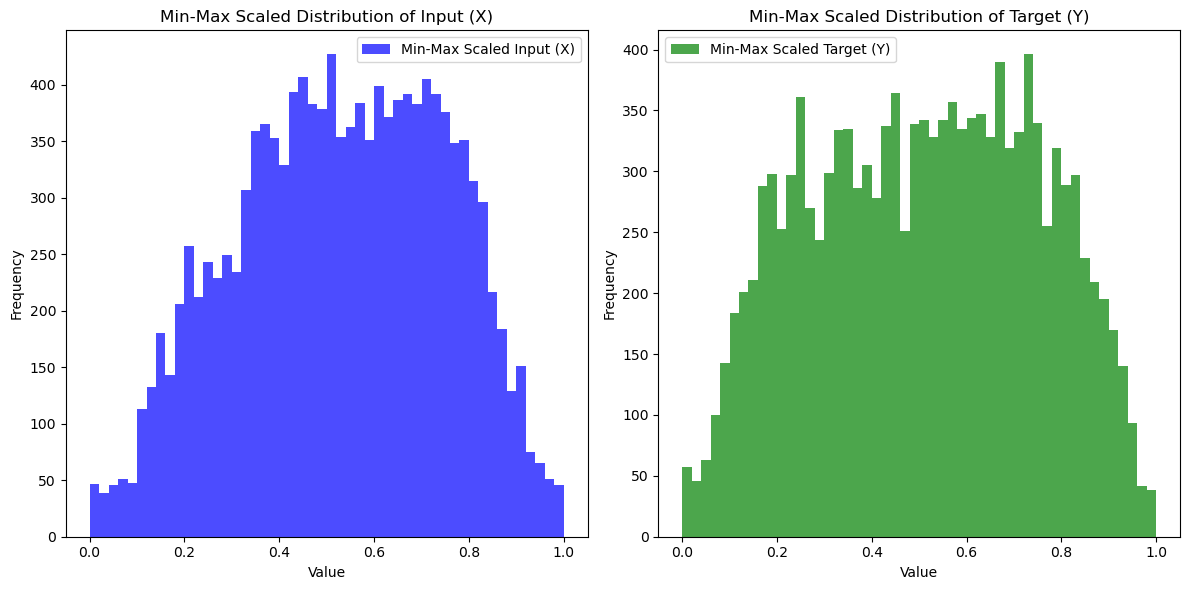

In [10]:
import matplotlib.pyplot as plt

# Flatten the tensors for easier visualization
train_day7_feats_minmaxed_flat = train_day7_feats_minmaxed.flatten().cpu().numpy()
train_day10_feats_minmaxed_flat = train_day10_feats_minmaxed.flatten().cpu().numpy()

# Plot histograms
plt.figure(figsize=(12, 6))

# Input (X) histogram after Min-Max scaling
plt.subplot(1, 2, 1)
plt.hist(train_day7_feats_minmaxed_flat, bins=50, color='blue', alpha=0.7, label='Min-Max Scaled Input (X)')
plt.title('Min-Max Scaled Distribution of Input (X)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Target (Y) histogram after Min-Max scaling
plt.subplot(1, 2, 2)
plt.hist(train_day10_feats_minmaxed_flat, bins=50, color='green', alpha=0.7, label='Min-Max Scaled Target (Y)')
plt.title('Min-Max Scaled Distribution of Target (Y)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
import torch
import torch.nn as nn

class FeaturePredictor(nn.Module):
    def __init__(self, input_size=20, output_size=20):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(16, 8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(8, 4),
            nn.BatchNorm1d(4),
        )
        self.decoder = nn.Sequential(
            nn.Linear(4, 8),
            nn.BatchNorm1d(8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Linear(16, output_size)
        )
    
    def forward(self, x):
        x = self.encoder(x)
        z = self.decoder(x)
        return z

# Example usage
model = FeaturePredictor()
print(model)


FeaturePredictor(
  (encoder): Sequential(
    (0): Linear(in_features=20, out_features=16, bias=True)
    (1): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=8, out_features=4, bias=True)
    (9): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=4, out_features=8, bias=True)
    (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=16, bias=True)
    (4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=20, b

class FeaturePredictor(nn.Module):
    def __init__(self, input_size=512, output_size=512):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 16),
            nn.BatchNorm1d(16),
        )
        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, output_size)
        )
    
    # Corrected indentation for forward method
    def forward(self, x):
        x = self.encoder(x)
        z = self.decoder(x)
        return z

import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

class FeaturePredictor(nn.Module):
    def __init__(self, input_size=512, output_size=512):
        super(FeaturePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16,8),
            nn.ReLU(),
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128,256),
            nn.ReLU(),
            nn.Linear(256, output_size)
        )
    
    def forward(self, x):
        return self.model(x)

In [12]:
model = FeaturePredictor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [13]:
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, Subset

In [14]:
from torch.utils.data import TensorDataset

optimizer_class = torch.optim.Adam



In [15]:
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, Subset
import numpy as np
import torch


In [16]:

class EarlyStopping:
    def __init__(self, patience=10, delta=0.0):
        """
        Args:
            patience (int): How many epochs to wait after the last validation loss improvement.
            delta (float): Minimum change in the validation loss to qualify as an improvement.
        """
        self.patience = patience
        self.delta = delta
        self.best_loss = None
        self.no_improvement_epochs = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.no_improvement_epochs = 0
        else:
            self.no_improvement_epochs += 1
            if self.no_improvement_epochs >= self.patience:
                self.early_stop = True


def cross_validate_with_early_stopping(
    model_class, dataset, criterion, optimizer_class, num_epochs=50, n_splits=10, patience=10, device='cuda'
):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    histories = []
    best_models = []

    for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
        print(f"Fold {fold + 1}/{n_splits}")

        # Create subsets for this fold
        train_subset = Subset(dataset, train_idx)
        val_subset = Subset(dataset, val_idx)

        # Create DataLoaders
        train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)

        # Initialize the model, optimizer, and early stopping for this fold
        model = model_class().to(device)
        optimizer = optimizer_class(model.parameters(), lr=1e-4)
        early_stopping = EarlyStopping(patience=patience)

        # Training and validation loop
        history = {'train_loss': [], 'val_loss': []}
        for epoch in range(num_epochs):
            # Training phase
            model.train()
            train_loss = 0.0
            for batch_inputs, batch_targets in train_loader:
                batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)

                # Forward pass
                outputs = model(batch_inputs)
                loss = criterion(outputs, batch_targets)
                train_loss += loss.item()

                # Backward pass and optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            train_loss /= len(train_loader)
            history['train_loss'].append(train_loss)

            # Validation phase
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for batch_inputs, batch_targets in val_loader:
                    batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
                    outputs = model(batch_inputs)
                    loss = criterion(outputs, batch_targets)
                    val_loss += loss.item()

            val_loss /= len(val_loader)
            history['val_loss'].append(val_loss)

            print(f"Epoch [{epoch + 1}/{num_epochs}] Fold {fold + 1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

            # Check early stopping
            early_stopping(val_loss)
            if early_stopping.early_stop:
                print(f"Early stopping at epoch {epoch + 1} for fold {fold + 1}")
                break

        # Save the best model for this fold
        best_models.append(model.state_dict())
        histories.append(history)

    return histories, best_models



In [17]:
# MIN MAX
dataset = TensorDataset(train_day7_feats_minmaxed, train_day10_feats_minmaxed)

cv_histories, best_models = cross_validate_with_early_stopping(
    model_class=FeaturePredictor,
    dataset=dataset,
    criterion=nn.MSELoss(),
    optimizer_class=torch.optim.Adam,
    num_epochs=1500,
    patience=500
)


Fold 1/10
Epoch [1/1500] Fold 1, Train Loss: 0.5035, Val Loss: 0.3446
Epoch [2/1500] Fold 1, Train Loss: 0.4884, Val Loss: 0.3547
Epoch [3/1500] Fold 1, Train Loss: 0.4673, Val Loss: 0.3661
Epoch [4/1500] Fold 1, Train Loss: 0.4468, Val Loss: 0.3584
Epoch [5/1500] Fold 1, Train Loss: 0.4339, Val Loss: 0.3525
Epoch [6/1500] Fold 1, Train Loss: 0.4082, Val Loss: 0.3419
Epoch [7/1500] Fold 1, Train Loss: 0.3974, Val Loss: 0.3332
Epoch [8/1500] Fold 1, Train Loss: 0.3809, Val Loss: 0.3264
Epoch [9/1500] Fold 1, Train Loss: 0.3696, Val Loss: 0.3142
Epoch [10/1500] Fold 1, Train Loss: 0.3582, Val Loss: 0.3080
Epoch [11/1500] Fold 1, Train Loss: 0.3450, Val Loss: 0.3048
Epoch [12/1500] Fold 1, Train Loss: 0.3304, Val Loss: 0.3032
Epoch [13/1500] Fold 1, Train Loss: 0.3244, Val Loss: 0.2988
Epoch [14/1500] Fold 1, Train Loss: 0.3132, Val Loss: 0.2885
Epoch [15/1500] Fold 1, Train Loss: 0.3007, Val Loss: 0.2815
Epoch [16/1500] Fold 1, Train Loss: 0.2862, Val Loss: 0.2638
Epoch [17/1500] Fold 1,

In [18]:
# Example: Average validation loss across folds
avg_val_loss = np.mean([history['val_loss'][-1] for history in cv_histories])
print(f"Average Validation Loss: {avg_val_loss:.4f}")


Average Validation Loss: 0.0251


In [19]:
# Analyze the best results for each fold outside the training function
for fold_idx, history in enumerate(cv_histories):
    # Find the epoch with the lowest validation loss
    best_epoch = int(np.argmin(history['val_loss'])) + 1  # Adding 1 because epochs are 1-indexed
    best_val_loss = history['val_loss'][best_epoch - 1]  # Accessing the loss using 0-based index
    best_train_loss = history['train_loss'][best_epoch - 1]

    print(f"Fold {fold_idx + 1}:")
    print(f"  Best Validation Loss = {best_val_loss:.4f}")
    print(f"  Corresponding Training Loss = {best_train_loss:.4f}")
    print(f"  Best Epoch = {best_epoch}")


Fold 1:
  Best Validation Loss = 0.0163
  Corresponding Training Loss = 0.0202
  Best Epoch = 1488
Fold 2:
  Best Validation Loss = 0.0152
  Corresponding Training Loss = 0.0203
  Best Epoch = 1488
Fold 3:
  Best Validation Loss = 0.0186
  Corresponding Training Loss = 0.0193
  Best Epoch = 1450
Fold 4:
  Best Validation Loss = 0.0180
  Corresponding Training Loss = 0.0218
  Best Epoch = 1477
Fold 5:
  Best Validation Loss = 0.0812
  Corresponding Training Loss = 0.0302
  Best Epoch = 170
Fold 6:
  Best Validation Loss = 0.0192
  Corresponding Training Loss = 0.0202
  Best Epoch = 1498
Fold 7:
  Best Validation Loss = 0.0213
  Corresponding Training Loss = 0.0200
  Best Epoch = 1496
Fold 8:
  Best Validation Loss = 0.0135
  Corresponding Training Loss = 0.0203
  Best Epoch = 1463
Fold 9:
  Best Validation Loss = 0.0180
  Corresponding Training Loss = 0.0206
  Best Epoch = 1478
Fold 10:
  Best Validation Loss = 0.0173
  Corresponding Training Loss = 0.0206
  Best Epoch = 1453


In [20]:
def plot_loss_curves_separately(cv_histories):
    """
    Plot training and validation loss curves for each fold in separate figures.
    
    Args:
        cv_histories (list): List of loss histories for each fold.
    """
    # Plot Training Loss
    plt.figure(figsize=(10, 6))
    for fold, history in enumerate(cv_histories):
        epochs = range(1, len(history['train_loss']) + 1)  # Dynamically set range
        plt.plot(epochs, history['train_loss'], label=f'Fold {fold + 1} Train Loss')
    plt.title('Training Loss per Fold')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot Validation Loss
    plt.figure(figsize=(10, 6))
    for fold, history in enumerate(cv_histories):
        epochs = range(1, len(history['val_loss']) + 1)  # Dynamically set range
        plt.plot(epochs, history['val_loss'], label=f'Fold {fold + 1} Val Loss', linestyle='--')
    plt.title('Validation Loss per Fold')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


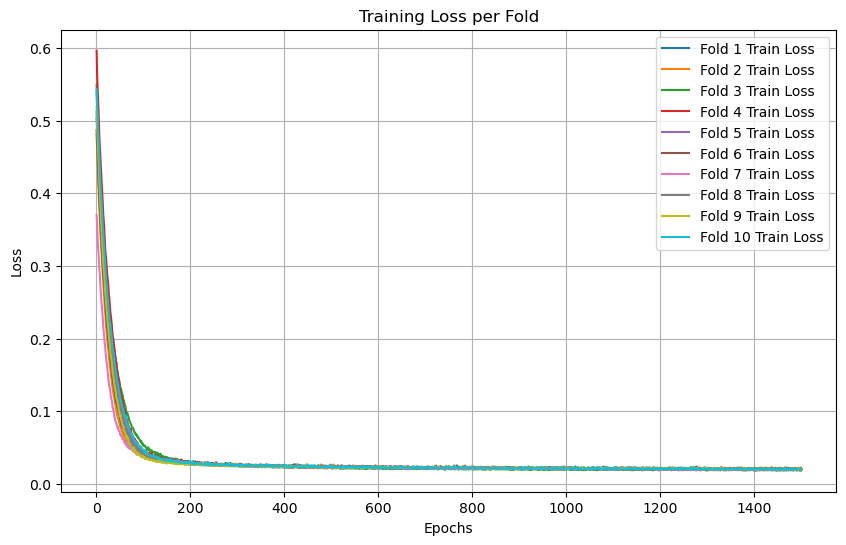

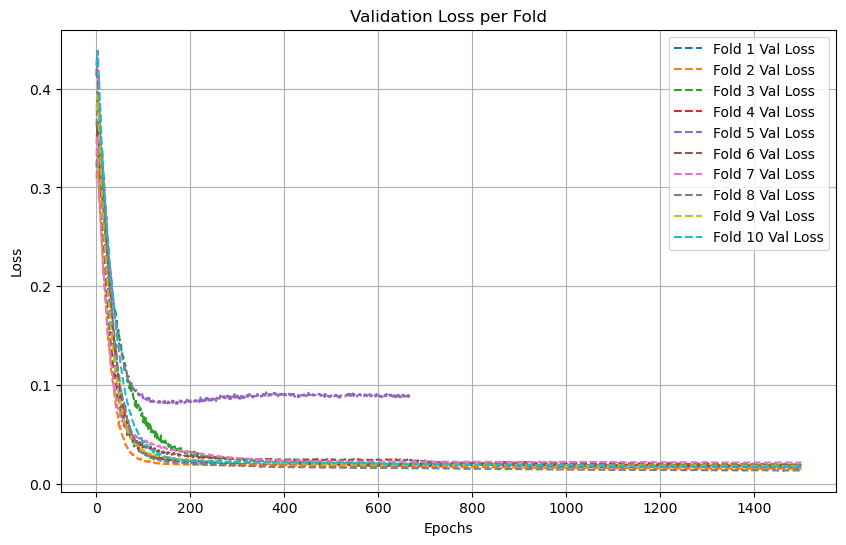

In [21]:
import matplotlib.pyplot as plt
plot_loss_curves_separately(cv_histories)


In [22]:
import torch
import numpy as np

# Track the best validation loss across all folds
lowest_val_loss = float('inf')
best_model_idx = -1  # Index of the best model
best_model_state = None

# Find the fold with the lowest validation loss
for fold_idx, history in enumerate(cv_histories):
    # Get the best validation loss for this fold
    best_val_loss = min(history['val_loss'])
    
    # Check if this is the lowest validation loss across all folds
    if best_val_loss < lowest_val_loss:
        lowest_val_loss = best_val_loss
        best_model_idx = fold_idx
        best_model_state = best_models[fold_idx]

# Save the model with the lowest validation loss
if best_model_state is not None:
    save_path = f'bestmodel_ex_{best_model_idx + 1}.pth'
    torch.save(best_model_state, save_path)
    print(f"Model from fold {best_model_idx + 1} with the lowest validation loss ({lowest_val_loss:.4f}) saved to {save_path}.")
else:
    print("No model to save.")


Model from fold 8 with the lowest validation loss (0.0135) saved to bestmodel_ex_8.pth.


In [ ]:
s